In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("GOOGL.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2335 non-null   object 
 1   Open       2335 non-null   float64
 2   High       2335 non-null   float64
 3   Low        2335 non-null   float64
 4   Close      2335 non-null   float64
 5   Adj Close  2335 non-null   float64
 6   Volume     2335 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 127.8+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2330,2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2331,2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2332,2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000
2333,2018-08-28,1255.900024,1256.560059,1242.969971,1245.859985,1245.859985,1366500
2334,2018-08-29,1255.000000,1267.170044,1252.800049,1264.650024,1264.650024,1846300


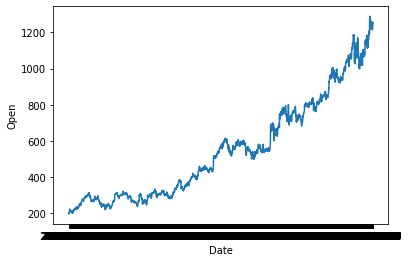

In [8]:
sns.lineplot(x=data['Date'],y=data['Open'])

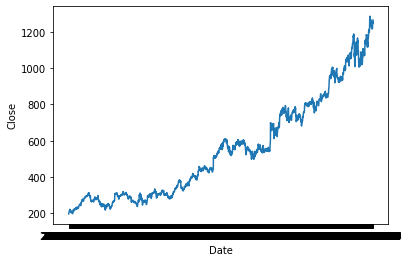

In [9]:
sns.lineplot(x=data['Date'],y=data['Close'])

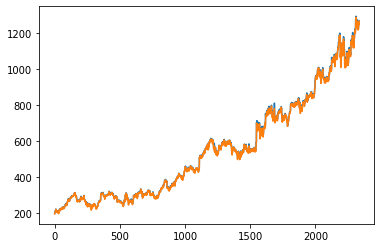

In [10]:
plt.plot(data['High'])
plt.plot(data['Close'])

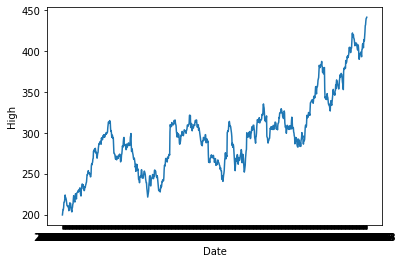

In [11]:
sns.lineplot(x=data['Date'].head(1000),y=data['High'])

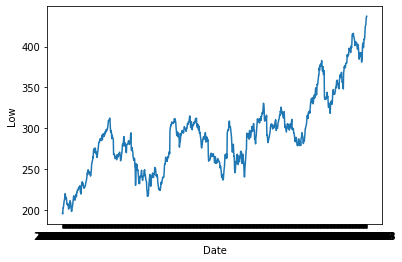

In [12]:
sns.lineplot(x=data['Date'].head(1000),y=data['Low'])

In [13]:
data['Date']=[i for i in range(0,2335)]

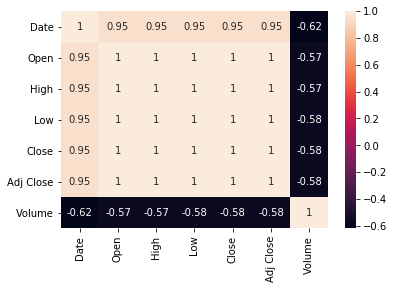

In [14]:
sns.heatmap(data.corr(),annot=True)

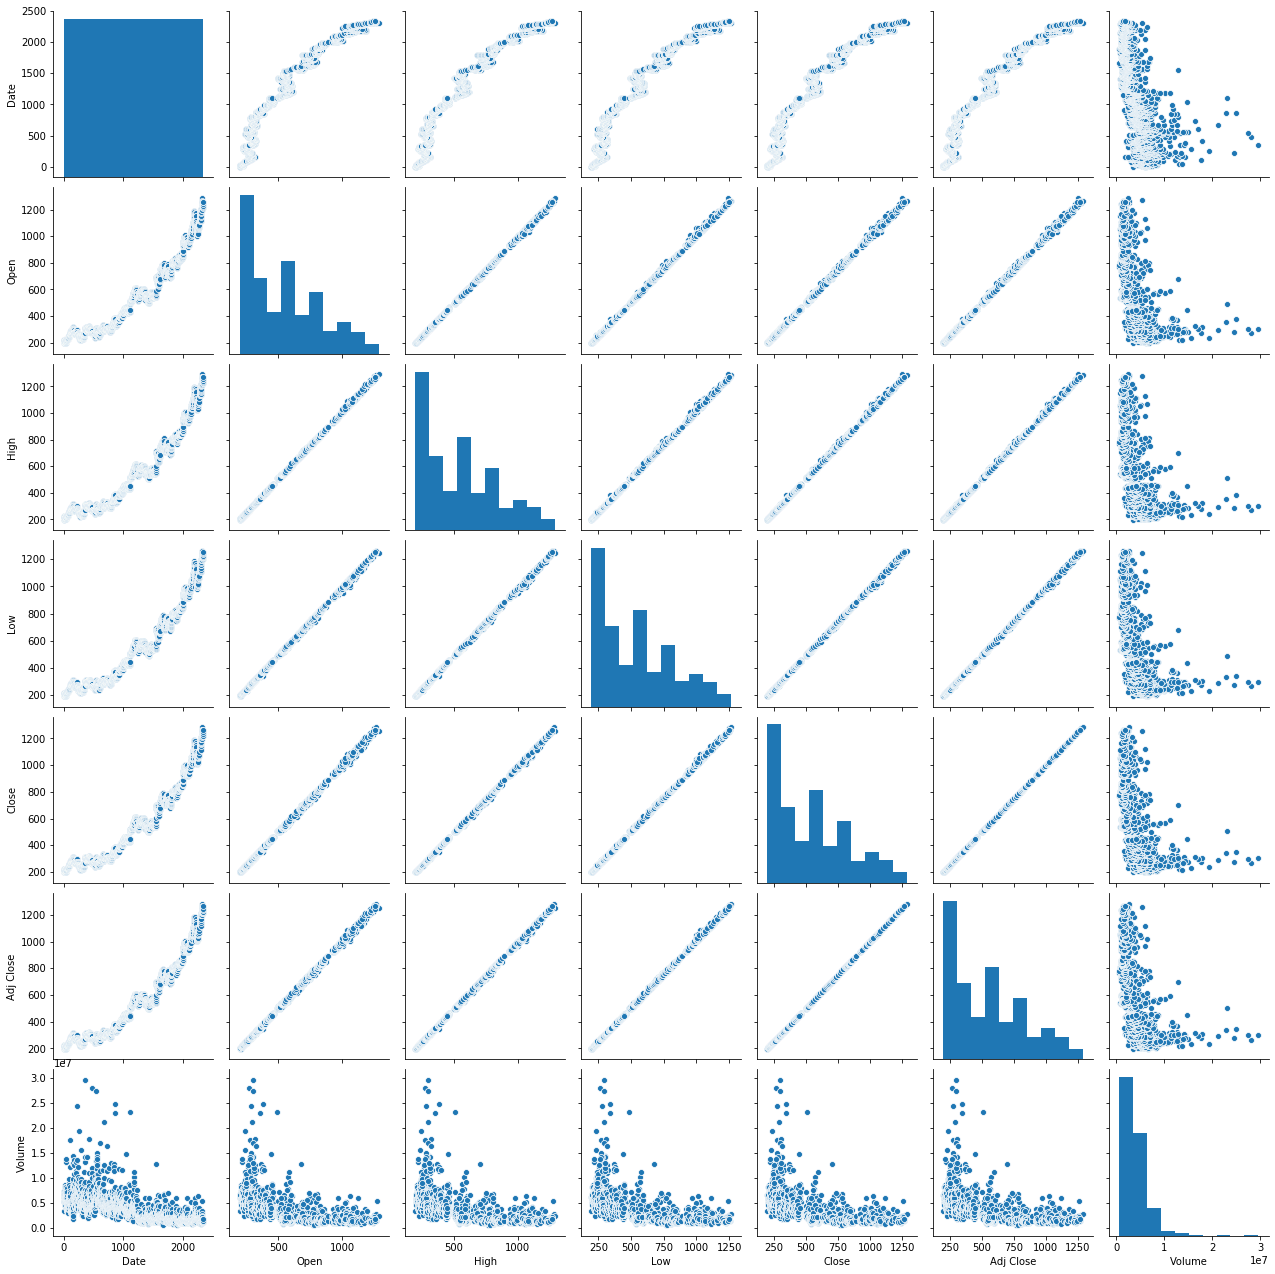

In [200]:
sns.pairplot(data)

In [15]:
x=data.drop(['Date','Close','Adj Close','Volume'],axis=1).values
y=data['Close'].values
x

array([[ 198.528534,  199.524521,  196.196198],
       [ 196.171173,  202.702698,  195.19519 ],
       [ 203.023026,  206.136139,  202.607605],
       ...,
       [1244.140015, 1257.869995, 1240.680054],
       [1255.900024, 1256.560059, 1242.969971],
       [1255.      , 1267.170044, 1252.800049]])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
test = [[1358.18,1395.60,1347.01]]
test_pred =lr.predict(test)
test_pred

array([[1378.27341895]])

In [20]:
y_pred =lr.predict(x_test)
predictions = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

ValueError: If using all scalar values, you must pass an index

In [101]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=1000, tol=1e-3)
reg.fit(x_train,y_train)

reg_pred = reg.predict(x_test)
reg_pred

array([-7.80821947e+14, -6.18717139e+14, -8.97862461e+14, -2.95231896e+14,
       -7.99202674e+14, -3.21328142e+14, -5.85143870e+14, -3.49045422e+14,
       -8.97591515e+14, -2.37272260e+14, -2.43512399e+14, -8.24176122e+14,
       -2.75010599e+14, -2.07781792e+14, -5.75190098e+14, -7.96360278e+14,
       -2.33372196e+14, -6.27104399e+14, -6.35174425e+14, -2.45324798e+14,
       -4.65448426e+14, -5.50919854e+14, -4.45082301e+14, -5.93605443e+14,
       -8.28043470e+14, -5.52185570e+14, -1.83862460e+14, -2.15443503e+14,
       -6.47216358e+14, -6.19955338e+14, -6.43047202e+14, -2.21264061e+14,
       -2.17107724e+14, -2.53838997e+14, -4.21523325e+14, -2.48483291e+14,
       -2.30478354e+14, -5.40132239e+14, -2.37167484e+14, -8.90181858e+14,
       -6.38445950e+14, -7.52294578e+14, -5.49685370e+14, -8.24720125e+14,
       -4.32469851e+14, -6.08970528e+14, -1.90841614e+14, -1.80857014e+14,
       -1.76362012e+14, -7.78648292e+14, -9.00615003e+14, -2.46321727e+14,
       -7.43049439e+14, -

In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_pred)

2.398056982354746e+29

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

9.025636611100527

In [116]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9998853084406957

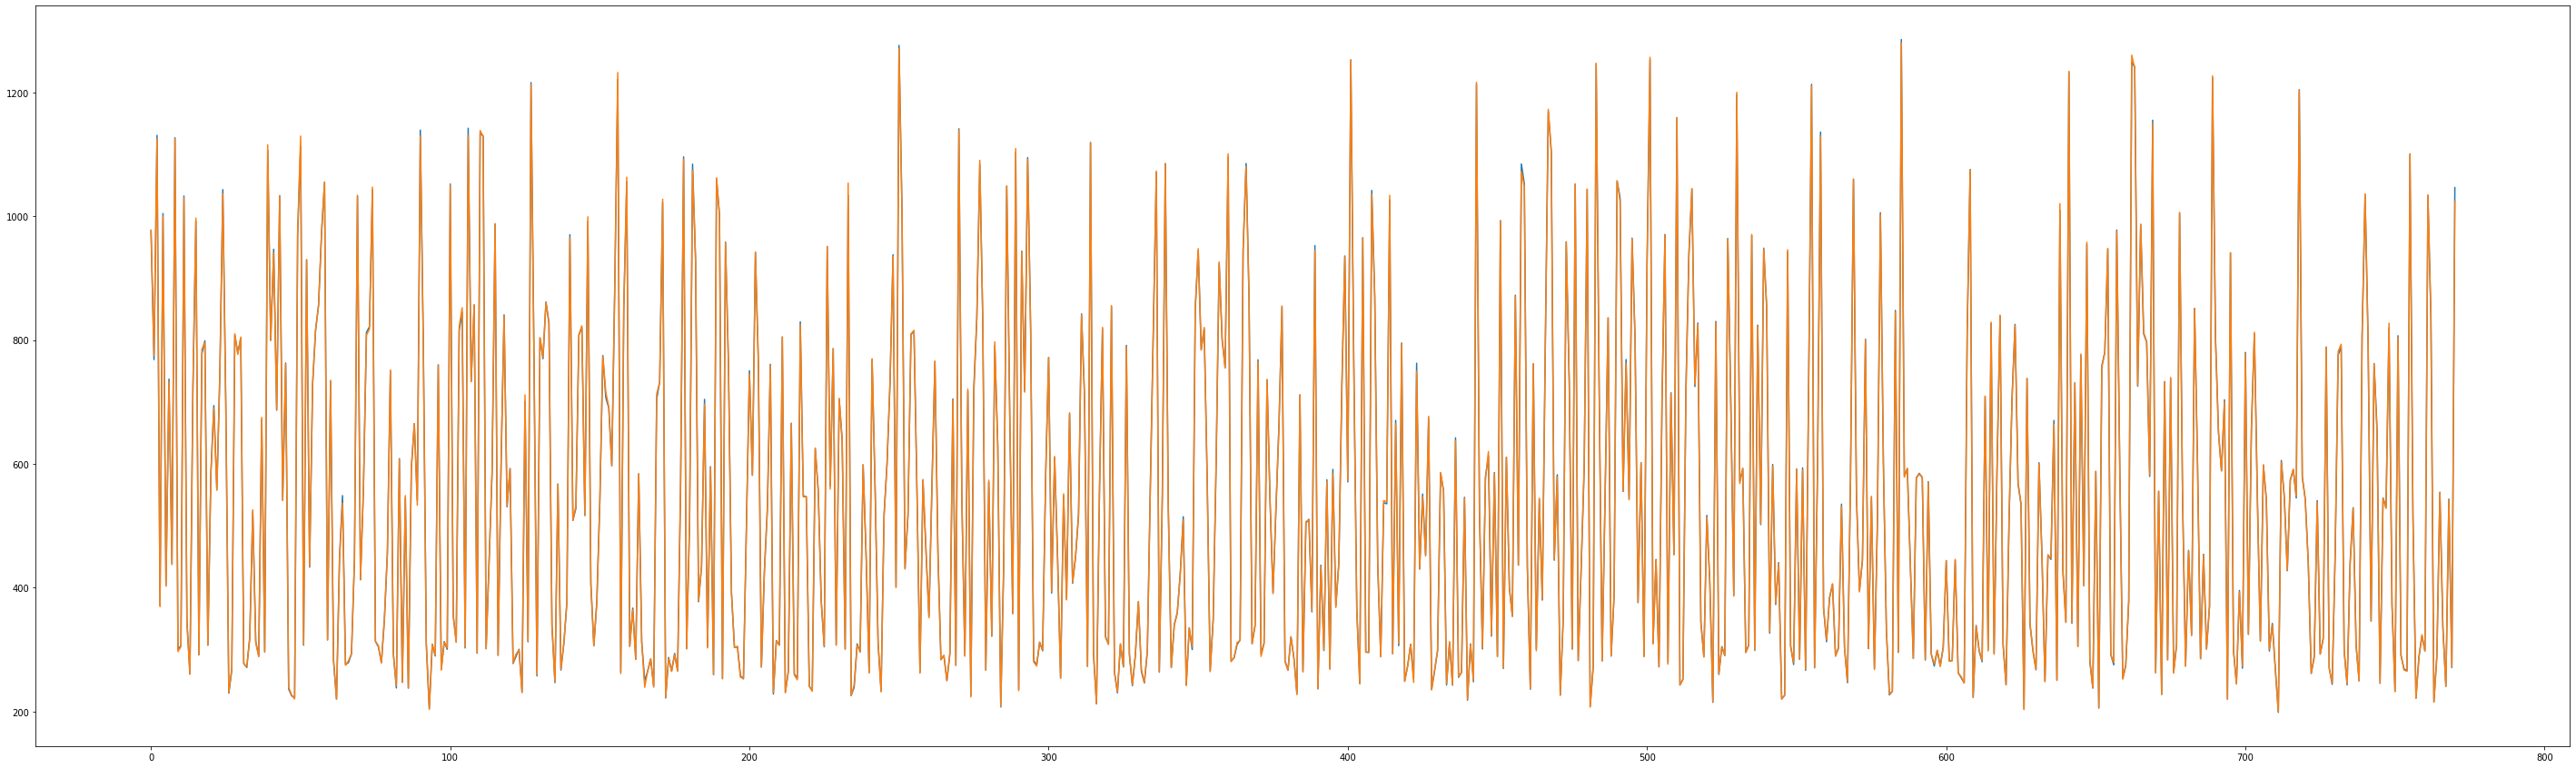

In [110]:
plt.figure(figsize=(50,15))
plt.plot(y_test)
plt.plot(y_pred)

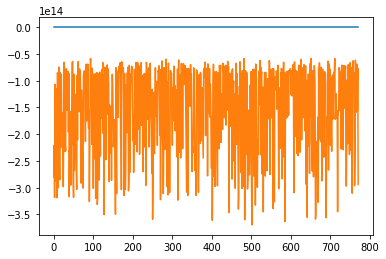

In [78]:
plt.plot(y_test)
plt.plot(reg_pred)

In [62]:
x_train.shape

(1564,)

In [63]:
y_train.shape

(1564,)

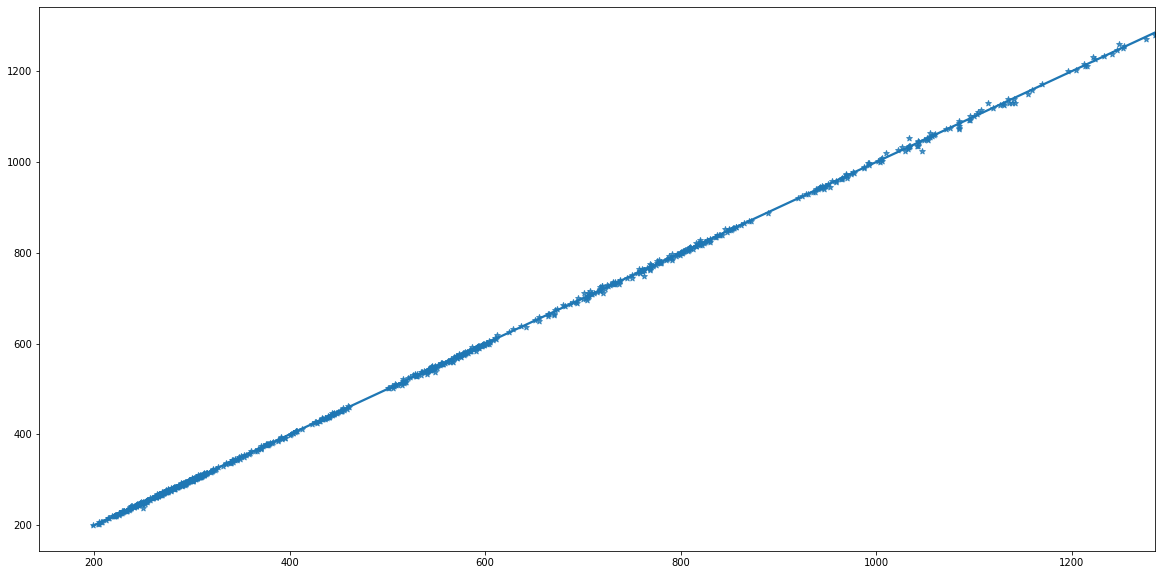

In [119]:
plt.figure(figsize=(20,10))
sns.regplot(y_test,y_pred,marker='*')

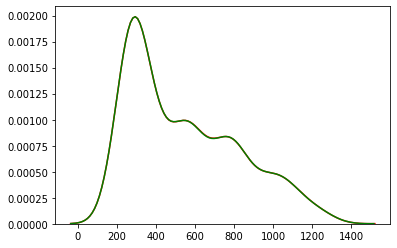

In [105]:
sns.distplot(y_test,hist=False,color='r')
sns.distplot(y_pred,hist=False,color='g')